In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
X_train.shape

(784, 41000)

In [6]:
Y_train.shape

(41000,)

In [7]:
def init_params():
    W1 = np.random.rand(100, 784) - 0.5
    b1 = np.random.rand(100, 1) - 0.5
    W2 = np.random.rand(100, 100) - 0.5
    b2 = np.random.rand(100, 1) - 0.5
    W3 = np.random.rand(10, 100) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3 
    return W1, b1, W2, b2, W3, b3

In [8]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    acc = np.zeros((iterations,2))
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            acc[i][1] = get_accuracy(predictions, Y)
            acc[i][0]= i
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3, acc

In [9]:
W1, b1, W2, b2, W3, b3, acc = gradient_descent(X_train, Y_train, 0.10, 1200)

Iteration:  0
[5 8 5 ... 5 8 5] [4 0 1 ... 1 8 1]
[5 8 5 ... 5 8 5] [4 0 1 ... 1 8 1]
0.09760975609756098
Iteration:  10
[4 8 1 ... 8 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 8 8 1] [4 0 1 ... 1 8 1]
0.3655609756097561
Iteration:  20
[4 8 1 ... 8 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 8 8 1] [4 0 1 ... 1 8 1]
0.4535609756097561
Iteration:  30
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
0.533609756097561
Iteration:  40
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
0.5947560975609756
Iteration:  50
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
0.6397073170731707
Iteration:  60
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
0.6717560975609757
Iteration:  70
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
0.697
Iteration:  80
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
0.7198536585365853
Iteration:  90
[4 8 1 ... 1 8 1] [4 0 1 ... 1 8 1]
[4 8 1 ..

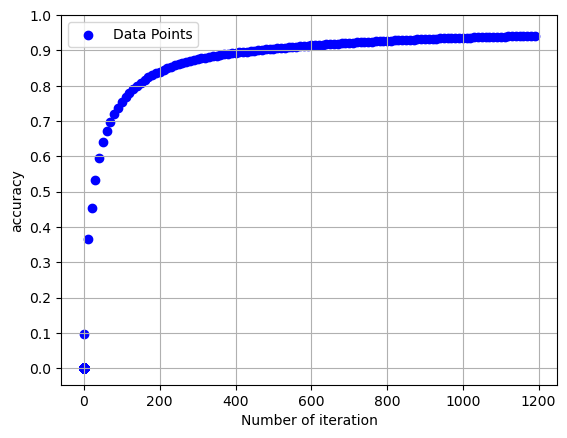

In [10]:
x = acc[:, 0]
y = acc[:, 1]

plt.scatter(x, y, color='b', marker='o', label="Data Points")

# Labels and title
plt.xlabel("Number of iteration")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.yticks(np.arange(min(y), max(y) + 0.1, 0.1))

# Show plot
plt.show()

In [11]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _,_,_, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[7 8 7 2 2 7 3 4 5 2 9 0 8 2 8 8 0 2 7 4 6 4 1 9 5 9 2 3 2 4 1 5 5 4 0 2 3
 5 2 7 5 9 2 7 8 6 0 4 2 1 4 6 9 7 4 9 6 2 0 0 2 4 4 0 2 6 9 9 2 5 7 5 2 1
 8 3 3 1 4 3 7 3 1 6 1 3 7 5 9 6 8 9 5 4 6 7 6 3 9 3 4 9 3 7 5 6 4 4 6 3 7
 6 1 1 1 3 3 2 5 8 4 9 0 3 4 8 1 7 3 8 8 6 5 1 3 8 2 4 1 7 6 6 1 5 1 6 5 7
 6 1 0 3 2 0 4 2 9 1 7 9 3 5 1 5 0 7 1 4 2 1 8 4 1 8 9 9 8 2 4 7 4 5 1 9 4
 0 2 9 4 7 4 3 8 2 0 4 6 6 8 1 1 6 4 1 9 1 1 6 9 7 3 0 2 1 6 6 8 5 6 9 1 9
 3 1 6 4 6 4 1 0 7 6 8 2 6 3 4 6 8 1 9 6 8 9 3 7 9 2 8 1 4 4 1 3 7 4 5 5 8
 0 1 9 7 2 2 9 5 1 9 7 4 6 8 6 0 4 3 5 9 8 0 7 5 2 2 2 3 6 5 8 8 9 2 3 6 0
 8 0 7 8 1 3 6 7 9 1 6 3 5 7 5 1 8 8 6 8 9 8 5 4 0 0 9 4 2 7 2 3 6 5 3 7 3
 5 1 1 6 7 3 6 1 8 7 9 1 0 5 5 3 4 8 8 7 0 3 6 2 1 1 7 4 7 9 4 4 2 4 3 9 9
 8 1 5 3 4 4 7 4 5 8 4 7 5 1 7 0 9 1 8 6 3 4 2 4 4 9 8 1 9 2 5 6 4 9 1 0 3
 2 6 2 9 9 1 4 8 9 1 2 1 6 5 3 5 7 8 2 5 7 7 5 9 0 5 0 6 6 8 3 6 3 8 0 3 9
 7 8 3 2 0 1 0 0 1 4 1 9 2 3 7 4 4 6 5 0 9 6 0 5 8 3 3 1 2 3 6 3 6 7 8 0 9
 5 8 3 6 4 8 5 6 9 8 0 2 

0.925

Prediction:  [4]
Label:  4


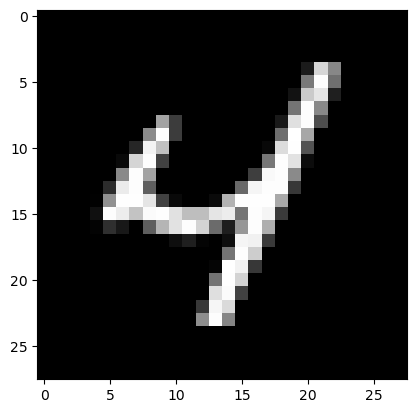

Prediction:  [0]
Label:  0


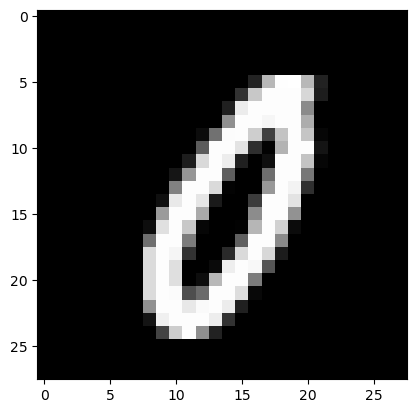

Prediction:  [1]
Label:  1


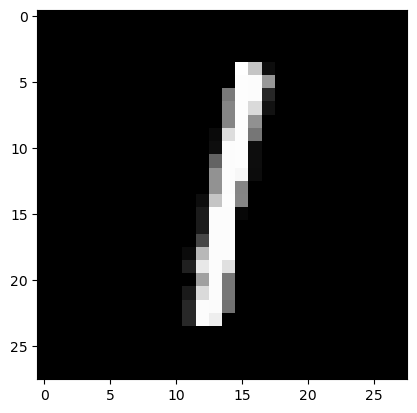

Prediction:  [0]
Label:  0


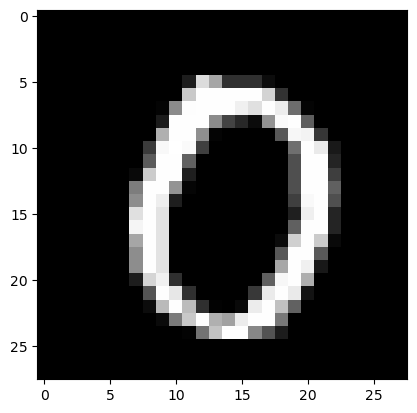

In [12]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)